In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df2 = df.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['species'])
df['Species'] = encoded

In [5]:
df.drop(['species'],axis=1,inplace=True)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 0.92, 'Plot before reducing the dimensions')

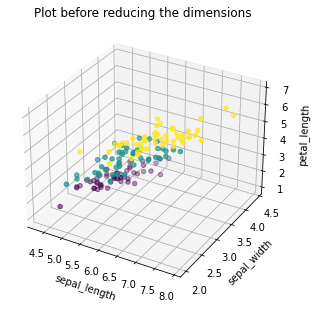

In [7]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection = '3d')

x = df['sepal_length']
y = df['sepal_width']
z = df['petal_length']

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")

ax.scatter(x, y, z, c=df['Species'])

plt.title("Plot before reducing the dimensions")

In [18]:
# scaling the values present in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns = df2.columns)
scaled_df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


In [22]:
X = scaled_df[['sepal_length','sepal_width','petal_length']]
y = df2['species']

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(X,y)
component_df = pd.DataFrame(data=x_lda, columns=['component_value 1','component_value 2'])

In [24]:
component_df[:5]

,component_value 1,component_value 2
0,-7.181297,0.287299
1,-6.450058,-1.124251
2,-6.723449,-0.446158
3,-5.853298,-0.558438
4,-7.155455,0.659249


In [25]:
# checking the shape of the reduced data
component_df.shape

(150, 2)

In [26]:
reduced_df = pd.concat([component_df,df2['species']],axis=1)
reduced_df[:5]

,component_value 1,component_value 2,species
0,-7.181297,0.287299,setosa
1,-6.450058,-1.124251,setosa
2,-6.723449,-0.446158,setosa
3,-5.853298,-0.558438,setosa
4,-7.155455,0.659249,setosa


Text(0.5, 1.0, 'Plot after reducing the dimensions')

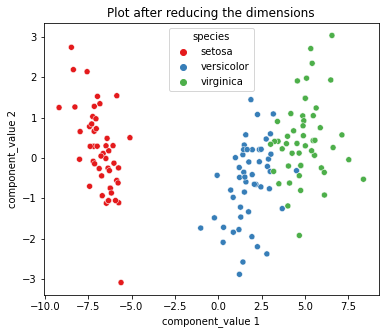

In [30]:
plt.figure(figsize=(6,5))
sns.scatterplot(data = reduced_df, x="component_value 1", y="component_value 2", hue="species", palette='Set1')
plt.title('Plot after reducing the dimensions')

<h2>ANALYSIS</h2>

* Let's create a ML model and train with original data and reduced data
* Then we compare with the amount of time the model takes to train and also the accuracy

In [31]:
# Original data with 3 dimensions
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# reduced data with 2 dimensions
reduced_df.head()

,component_value 1,component_value 2,species
0,-7.181297,0.287299,setosa
1,-6.450058,-1.124251,setosa
2,-6.723449,-0.446158,setosa
3,-5.853298,-0.558438,setosa
4,-7.155455,0.659249,setosa


<h3>Analysis for Original Data</h3>

In [ ]:
X = df2[['sepal_length','sepal_width','petal_length']]
y = df2['Species']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [34]:
# let's consider a decision tree model
from sklearn.tree import DecisionTreeClassifier
original_model = DecisionTreeClassifier().fit(X_train, y_train)
original_pred = original_model.predict(X_test)

In [35]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,original_pred))
print(confusion_matrix(y_test, original_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

[[19  0  0]
 [ 0 13  0]
 [ 0  3 10]]


<h3>Analysis for Reduced Data</h3>

In [37]:
X = reduced_df[['component_value 1','component_value 2']]
y = reduced_df['species']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [39]:
# let's consider a decision tree model
from sklearn.tree import DecisionTreeClassifier
reduced_model = DecisionTreeClassifier().fit(X_train, y_train)
reduced_pred = reduced_model.predict(X_test)

In [40]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,reduced_pred))
print(confusion_matrix(y_test, reduced_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]


* we see that the reduced data is performing well